## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9605611	total: 59.8ms	remaining: 59.7s
1:	learn: 0.9416711	total: 60.7ms	remaining: 30.3s
2:	learn: 0.9219285	total: 61.6ms	remaining: 20.5s
3:	learn: 0.9059489	total: 62.6ms	remaining: 15.6s
4:	learn: 0.8904200	total: 63.6ms	remaining: 12.7s
5:	learn: 0.8750034	total: 64.6ms	remaining: 10.7s
6:	learn: 0.8602710	total: 65.5ms	remaining: 9.29s
7:	learn: 0.8439259	total: 66.4ms	remaining: 8.23s
8:	learn: 0.8294348	total: 67.2ms	remaining: 7.4s
9:	learn: 0.8150192	total: 68.4ms	remaining: 6.77s
10:	learn: 0.8011484	total: 70.3ms	remaining: 6.32s
11:	learn: 0.7878085	total: 71.4ms	remaining: 5.88s
12:	learn: 0.7736105	total: 72.8ms	remaining: 5.52s
13:	learn: 0.7604071	total: 73.7ms	remaining: 5.19s
14:	learn: 0.7487178	total: 74.7ms	remaining: 4.91s
15:	learn: 0.7353637	total: 75.7ms	remaining: 4.66s
16:	learn: 0.7253171	total: 76.5ms	remaining: 4.42s
17:	learn: 0.7150087	total: 77.4ms	remaining: 4.22s
18:	learn: 0.7037839	total: 78.2ms	remaining:

49:	learn: 0.4707373	total: 107ms	remaining: 2.03s
50:	learn: 0.4652875	total: 108ms	remaining: 2.01s
51:	learn: 0.4601337	total: 109ms	remaining: 1.99s
52:	learn: 0.4557984	total: 110ms	remaining: 1.96s
53:	learn: 0.4518661	total: 110ms	remaining: 1.93s
54:	learn: 0.4477631	total: 111ms	remaining: 1.91s
55:	learn: 0.4447866	total: 112ms	remaining: 1.89s
56:	learn: 0.4404510	total: 113ms	remaining: 1.87s
57:	learn: 0.4359643	total: 114ms	remaining: 1.85s
58:	learn: 0.4316415	total: 115ms	remaining: 1.83s
59:	learn: 0.4279819	total: 117ms	remaining: 1.83s
60:	learn: 0.4236365	total: 118ms	remaining: 1.81s
61:	learn: 0.4193896	total: 119ms	remaining: 1.8s
62:	learn: 0.4148715	total: 120ms	remaining: 1.78s
63:	learn: 0.4112257	total: 121ms	remaining: 1.77s
64:	learn: 0.4086124	total: 122ms	remaining: 1.75s
65:	learn: 0.4045279	total: 123ms	remaining: 1.73s
66:	learn: 0.4005385	total: 123ms	remaining: 1.72s
67:	learn: 0.3977412	total: 124ms	remaining: 1.7s
68:	learn: 0.3948951	total: 125ms

137:	learn: 0.2701561	total: 191ms	remaining: 1.19s
138:	learn: 0.2690616	total: 192ms	remaining: 1.19s
139:	learn: 0.2680059	total: 193ms	remaining: 1.18s
140:	learn: 0.2671678	total: 194ms	remaining: 1.18s
141:	learn: 0.2663491	total: 195ms	remaining: 1.18s
142:	learn: 0.2653636	total: 196ms	remaining: 1.18s
143:	learn: 0.2645818	total: 197ms	remaining: 1.17s
144:	learn: 0.2635221	total: 198ms	remaining: 1.17s
145:	learn: 0.2626958	total: 199ms	remaining: 1.16s
146:	learn: 0.2618441	total: 200ms	remaining: 1.16s
147:	learn: 0.2608589	total: 201ms	remaining: 1.15s
148:	learn: 0.2598885	total: 202ms	remaining: 1.15s
149:	learn: 0.2592344	total: 202ms	remaining: 1.15s
150:	learn: 0.2581326	total: 203ms	remaining: 1.14s
151:	learn: 0.2573550	total: 204ms	remaining: 1.14s
152:	learn: 0.2566929	total: 205ms	remaining: 1.13s
153:	learn: 0.2558492	total: 206ms	remaining: 1.13s
154:	learn: 0.2548538	total: 207ms	remaining: 1.13s
155:	learn: 0.2536901	total: 208ms	remaining: 1.12s
156:	learn: 

247:	learn: 0.1969557	total: 295ms	remaining: 895ms
248:	learn: 0.1967357	total: 296ms	remaining: 894ms
249:	learn: 0.1962513	total: 297ms	remaining: 892ms
250:	learn: 0.1959084	total: 298ms	remaining: 889ms
251:	learn: 0.1952595	total: 299ms	remaining: 887ms
252:	learn: 0.1947094	total: 300ms	remaining: 885ms
253:	learn: 0.1941603	total: 301ms	remaining: 883ms
254:	learn: 0.1936686	total: 301ms	remaining: 880ms
255:	learn: 0.1933838	total: 302ms	remaining: 878ms
256:	learn: 0.1929414	total: 303ms	remaining: 877ms
257:	learn: 0.1927448	total: 305ms	remaining: 876ms
258:	learn: 0.1921995	total: 306ms	remaining: 874ms
259:	learn: 0.1917967	total: 307ms	remaining: 872ms
260:	learn: 0.1915247	total: 307ms	remaining: 870ms
261:	learn: 0.1910612	total: 308ms	remaining: 868ms
262:	learn: 0.1908485	total: 309ms	remaining: 866ms
263:	learn: 0.1903354	total: 310ms	remaining: 864ms
264:	learn: 0.1897407	total: 311ms	remaining: 862ms
265:	learn: 0.1892418	total: 312ms	remaining: 860ms
266:	learn: 

337:	learn: 0.1626382	total: 379ms	remaining: 742ms
338:	learn: 0.1622406	total: 380ms	remaining: 741ms
339:	learn: 0.1620553	total: 381ms	remaining: 740ms
340:	learn: 0.1617318	total: 382ms	remaining: 739ms
341:	learn: 0.1614736	total: 383ms	remaining: 737ms
342:	learn: 0.1611833	total: 384ms	remaining: 736ms
343:	learn: 0.1607784	total: 385ms	remaining: 734ms
344:	learn: 0.1604679	total: 386ms	remaining: 733ms
345:	learn: 0.1601474	total: 387ms	remaining: 732ms
346:	learn: 0.1599769	total: 388ms	remaining: 730ms
347:	learn: 0.1596138	total: 389ms	remaining: 729ms
348:	learn: 0.1594729	total: 390ms	remaining: 727ms
349:	learn: 0.1591253	total: 391ms	remaining: 726ms
350:	learn: 0.1588533	total: 392ms	remaining: 725ms
351:	learn: 0.1586726	total: 393ms	remaining: 723ms
352:	learn: 0.1584169	total: 394ms	remaining: 722ms
353:	learn: 0.1577458	total: 395ms	remaining: 721ms
354:	learn: 0.1575838	total: 396ms	remaining: 720ms
355:	learn: 0.1571926	total: 397ms	remaining: 718ms
356:	learn: 

424:	learn: 0.1369319	total: 480ms	remaining: 649ms
425:	learn: 0.1367209	total: 481ms	remaining: 648ms
426:	learn: 0.1365854	total: 482ms	remaining: 647ms
427:	learn: 0.1364642	total: 483ms	remaining: 646ms
428:	learn: 0.1362660	total: 484ms	remaining: 644ms
429:	learn: 0.1359950	total: 485ms	remaining: 643ms
430:	learn: 0.1356623	total: 486ms	remaining: 642ms
431:	learn: 0.1353630	total: 487ms	remaining: 641ms
432:	learn: 0.1350956	total: 488ms	remaining: 639ms
433:	learn: 0.1348598	total: 489ms	remaining: 638ms
434:	learn: 0.1344735	total: 490ms	remaining: 637ms
435:	learn: 0.1343516	total: 492ms	remaining: 636ms
436:	learn: 0.1341626	total: 493ms	remaining: 636ms
437:	learn: 0.1339927	total: 495ms	remaining: 635ms
438:	learn: 0.1339141	total: 496ms	remaining: 634ms
439:	learn: 0.1334861	total: 498ms	remaining: 633ms
440:	learn: 0.1332045	total: 499ms	remaining: 632ms
441:	learn: 0.1328914	total: 501ms	remaining: 632ms
442:	learn: 0.1325947	total: 502ms	remaining: 632ms
443:	learn: 

498:	learn: 0.1199979	total: 561ms	remaining: 563ms
499:	learn: 0.1196861	total: 563ms	remaining: 563ms
500:	learn: 0.1195255	total: 564ms	remaining: 561ms
501:	learn: 0.1193815	total: 565ms	remaining: 560ms
502:	learn: 0.1192707	total: 566ms	remaining: 559ms
503:	learn: 0.1191199	total: 567ms	remaining: 558ms
504:	learn: 0.1188833	total: 567ms	remaining: 556ms
505:	learn: 0.1186391	total: 568ms	remaining: 555ms
506:	learn: 0.1185166	total: 569ms	remaining: 553ms
507:	learn: 0.1182497	total: 570ms	remaining: 552ms
508:	learn: 0.1180198	total: 570ms	remaining: 550ms
509:	learn: 0.1177411	total: 571ms	remaining: 549ms
510:	learn: 0.1175269	total: 572ms	remaining: 548ms
511:	learn: 0.1173469	total: 573ms	remaining: 546ms
512:	learn: 0.1170037	total: 574ms	remaining: 545ms
513:	learn: 0.1166974	total: 575ms	remaining: 544ms
514:	learn: 0.1164182	total: 576ms	remaining: 542ms
515:	learn: 0.1161620	total: 577ms	remaining: 541ms
516:	learn: 0.1160174	total: 578ms	remaining: 540ms
517:	learn: 

608:	learn: 0.0977738	total: 667ms	remaining: 428ms
609:	learn: 0.0976440	total: 668ms	remaining: 427ms
610:	learn: 0.0974873	total: 668ms	remaining: 426ms
611:	learn: 0.0973765	total: 669ms	remaining: 424ms
612:	learn: 0.0972569	total: 671ms	remaining: 424ms
613:	learn: 0.0971100	total: 672ms	remaining: 422ms
614:	learn: 0.0969604	total: 673ms	remaining: 421ms
615:	learn: 0.0967960	total: 674ms	remaining: 420ms
616:	learn: 0.0966454	total: 675ms	remaining: 419ms
617:	learn: 0.0964570	total: 676ms	remaining: 418ms
618:	learn: 0.0962290	total: 676ms	remaining: 416ms
619:	learn: 0.0959917	total: 677ms	remaining: 415ms
620:	learn: 0.0958396	total: 678ms	remaining: 414ms
621:	learn: 0.0956779	total: 679ms	remaining: 413ms
622:	learn: 0.0955425	total: 680ms	remaining: 411ms
623:	learn: 0.0953408	total: 681ms	remaining: 410ms
624:	learn: 0.0951587	total: 681ms	remaining: 409ms
625:	learn: 0.0949734	total: 682ms	remaining: 408ms
626:	learn: 0.0949172	total: 683ms	remaining: 406ms
627:	learn: 

696:	learn: 0.0840809	total: 750ms	remaining: 326ms
697:	learn: 0.0839523	total: 751ms	remaining: 325ms
698:	learn: 0.0838832	total: 752ms	remaining: 324ms
699:	learn: 0.0837930	total: 754ms	remaining: 323ms
700:	learn: 0.0836838	total: 754ms	remaining: 322ms
701:	learn: 0.0835542	total: 756ms	remaining: 321ms
702:	learn: 0.0833737	total: 757ms	remaining: 320ms
703:	learn: 0.0832563	total: 758ms	remaining: 319ms
704:	learn: 0.0831578	total: 758ms	remaining: 317ms
705:	learn: 0.0829524	total: 759ms	remaining: 316ms
706:	learn: 0.0828338	total: 760ms	remaining: 315ms
707:	learn: 0.0827113	total: 761ms	remaining: 314ms
708:	learn: 0.0825903	total: 762ms	remaining: 313ms
709:	learn: 0.0823688	total: 763ms	remaining: 311ms
710:	learn: 0.0823208	total: 763ms	remaining: 310ms
711:	learn: 0.0822690	total: 764ms	remaining: 309ms
712:	learn: 0.0821692	total: 766ms	remaining: 308ms
713:	learn: 0.0820514	total: 766ms	remaining: 307ms
714:	learn: 0.0819824	total: 768ms	remaining: 306ms
715:	learn: 

811:	learn: 0.0715378	total: 855ms	remaining: 198ms
812:	learn: 0.0714383	total: 856ms	remaining: 197ms
813:	learn: 0.0713354	total: 857ms	remaining: 196ms
814:	learn: 0.0712848	total: 858ms	remaining: 195ms
815:	learn: 0.0711205	total: 859ms	remaining: 194ms
816:	learn: 0.0710089	total: 860ms	remaining: 193ms
817:	learn: 0.0709062	total: 861ms	remaining: 192ms
818:	learn: 0.0708122	total: 862ms	remaining: 191ms
819:	learn: 0.0707462	total: 863ms	remaining: 190ms
820:	learn: 0.0705750	total: 864ms	remaining: 188ms
821:	learn: 0.0704262	total: 865ms	remaining: 187ms
822:	learn: 0.0702749	total: 866ms	remaining: 186ms
823:	learn: 0.0702035	total: 867ms	remaining: 185ms
824:	learn: 0.0701204	total: 867ms	remaining: 184ms
825:	learn: 0.0700276	total: 868ms	remaining: 183ms
826:	learn: 0.0699040	total: 869ms	remaining: 182ms
827:	learn: 0.0697582	total: 870ms	remaining: 181ms
828:	learn: 0.0696305	total: 870ms	remaining: 180ms
829:	learn: 0.0695792	total: 871ms	remaining: 178ms
830:	learn: 

902:	learn: 0.0625967	total: 938ms	remaining: 101ms
903:	learn: 0.0625544	total: 940ms	remaining: 99.8ms
904:	learn: 0.0624896	total: 941ms	remaining: 98.8ms
905:	learn: 0.0623835	total: 942ms	remaining: 97.7ms
906:	learn: 0.0623236	total: 943ms	remaining: 96.7ms
907:	learn: 0.0621855	total: 944ms	remaining: 95.6ms
908:	learn: 0.0620949	total: 944ms	remaining: 94.5ms
909:	learn: 0.0620123	total: 945ms	remaining: 93.5ms
910:	learn: 0.0619449	total: 946ms	remaining: 92.4ms
911:	learn: 0.0619003	total: 947ms	remaining: 91.4ms
912:	learn: 0.0618365	total: 948ms	remaining: 90.3ms
913:	learn: 0.0617242	total: 949ms	remaining: 89.3ms
914:	learn: 0.0616929	total: 950ms	remaining: 88.2ms
915:	learn: 0.0616367	total: 950ms	remaining: 87.2ms
916:	learn: 0.0615931	total: 951ms	remaining: 86.1ms
917:	learn: 0.0614912	total: 952ms	remaining: 85ms
918:	learn: 0.0613818	total: 953ms	remaining: 84ms
919:	learn: 0.0612739	total: 954ms	remaining: 83ms
920:	learn: 0.0612173	total: 955ms	remaining: 81.9ms


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

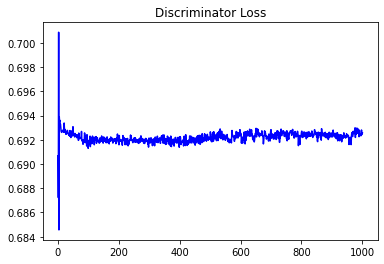

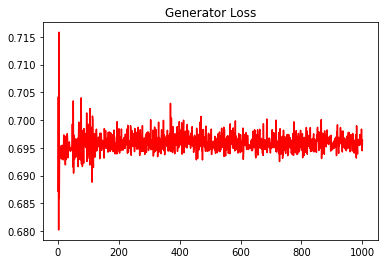

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09429904444804049


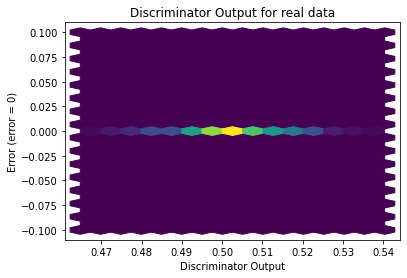

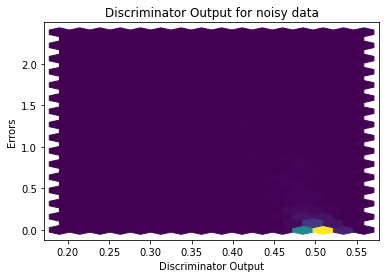

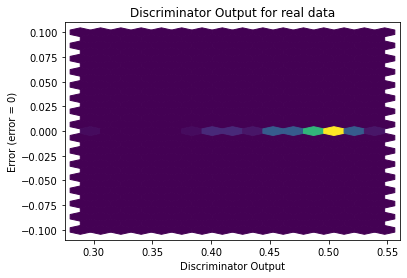

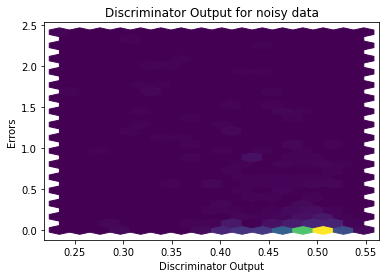

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


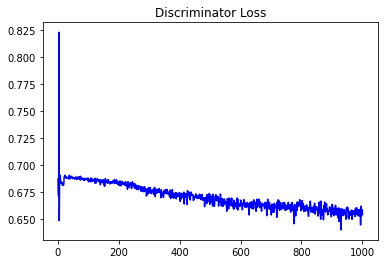

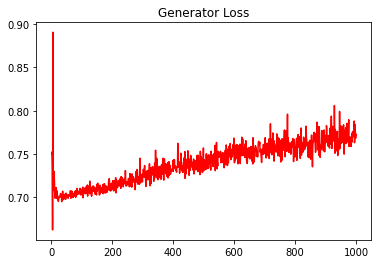

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08323528214564302


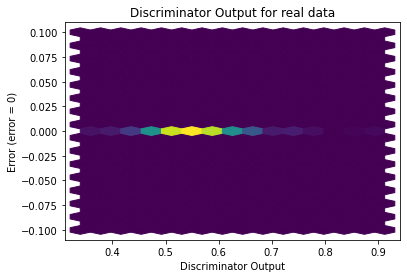

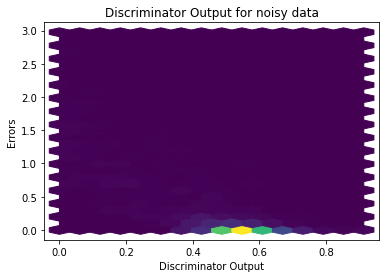

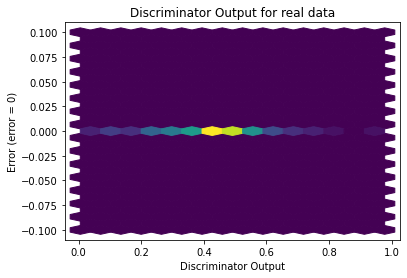

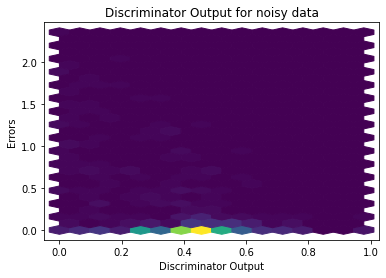

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1909]], requires_grad=True)
